In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from tqdm import tqdm
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
upBd1 = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
# Importación de los datos 2/2
data2 = pd.read_csv(io.BytesIO(upBd1['diabetes.csv']))

In [ ]:
data3 = data2 #Uso data3 para los cálculos que implican borrado y si tengo un error simplemente hago este reset

In [ ]:
# https://docs.google.com/spreadsheets/d/1TwxzNeIlsAdszuZq_CFXIiFkirTaICYq4QjHdyTqWfM/edit#gid=1887951615

# 2. Entregue la base de datos diabetes.csv con las respectivas transformaciones:
# -1/5 Debe calcular la media y mediana de cada una de las columnas numéricas
# -2/5 De las columnas categóricas decir cual es el valor que más se repite
# -3/5 Deberá borrar las columnas que tengan más del 80% de datos vacío
# -4/5 Rellene las columnas numéricas con la media si la desviación está por debajo de 20 y con la mediana si esta por encima de 20
# -5/5 Realice un gráfico de correlación y mencione cual es el par de variables más relacionadas

In [ ]:
def p31d5(df):
  # 1/5 Debe calcular la media y mediana de cada una de las columnas numéricas
  print('1/5 Cálculo de la media y mediana de las columnas numéricas \n')

  for i in range(0, len(df.columns)):
    if(is_numeric_dtype(df[df.columns[i]].dtype)):
      print(f"Columna[{i}] {df.columns[i]} -----> Media = {df[df.columns[i]].mean()}  Mediana = {df[df.columns[i]].median()}")


In [ ]:
p31d5(data2)

1/5 Cálculo de la media y mediana de las columnas numéricas 

Columna[0] Edad (años) -----> Media = 64.06984667802385  Mediana = 64.0
Columna[2] Genero -----> Media = 1.7163543441226576  Mediana = 2.0
Columna[5] Discapacidad -----> Media = 0.012605042016806723  Mediana = 0.0
Columna[7] Escolaridad -----> Media = 1.717206132879046  Mediana = 2.0
Columna[14] Clasificacion de Diabetes o del ultimo estado de Glicemia -----> Media = 1.6550255536626917  Mediana = 2.0
Columna[17] Tension SISTOLICA -----> Media = 128.23168654173764  Mediana = 120.0
Columna[18] Tension DIASTOLICA -----> Media = 80.95059625212947  Mediana = 80.0
Columna[20] Colesterol Total -----> Media = 199.36967632027256  Mediana = 197.0
Columna[21] Colesterol HDL -----> Media = 308.91561433447094  Mediana = 74.5
Columna[22] Trigliceridos -----> Media = 198.08517887563883  Mediana = 166.0
Columna[23] Colesterol LDL -----> Media = 697.4722222222222  Mediana = 193.0
Columna[24] CALCULO DE RIESGO DE Framingham (% a 10 años) ----

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
def p32d5(df):
  # 2/5 De las columnas categóricas decir cual es el valor que más se repite
  print('2/5 Cálculo del dato que más se repite en las las columnas categóricas \n')

  for i in range(0, len(df.columns)):
    if(is_numeric_dtype(df[df.columns[i]].dtype) == False):
      print(f"Columna[{i}] {df.columns[i]} -----> Valor que más se repite = {df[df.columns[i]].mode().values[0]}")

In [ ]:
p32d5(data2)

2/5 Cálculo del dato que más se repite en las las columnas categóricas 

Columna[1] Grupo de edad -----> Valor que más se repite = 65 y mas
Columna[3] Etnia -----> Valor que más se repite = Otra
Columna[4] Zona -----> Valor que más se repite = Urbana
Columna[6] Afiliacion SGSSS -----> Valor que más se repite = EMSSANAR
Columna[8] Regimen de Afiliación -----> Valor que más se repite = SUBSIDIADO
Columna[9] Fecha Control -----> Valor que más se repite = AUSENCIA
Columna[10] Fumador Activo -----> Valor que más se repite = No
Columna[11] ¿Diabetes? -----> Valor que más se repite = Si
Columna[12] Hipertensión Arterial Sistemica -----> Valor que más se repite = Si
Columna[13] HTA + DM -----> Valor que más se repite = Si
Columna[15] Complicaciones  y Lesiones en Organo Blanco -----> Valor que más se repite = Ninguna
Columna[16] Antecedentes Fliar  Enfermedad Coronaria -----> Valor que más se repite = No
Columna[19] HTA COMPENSADOS -----> Valor que más se repite = Si
Columna[25] Clasificación 

In [ ]:
def p33d5(df):
  ## 3/5 Borra las columnas que tengan más del 80% de datos vacíos
  print("3/5 Borrado de columnas que tengan más del 80% de sus datos vacíos\n")

  col = [df.columns[x] for x in range(0, len(df.columns)) if pd.isnull(df[df.columns[x]]).values.ravel().sum() > len(df) * 0.8]

  print(f"Listado de las {len(col)} columnas a borrar:\n {col}")

  for i in range(0, len(col)):
    df = df.drop(col[i],axis = 1)
  return df

In [ ]:
data3 = p33d5(data3)

3/5 Borrado de columnas que tengan más del 80% de sus datos vacíos

Listado de las 5 columnas a borrar:
 ['Hemoglobina A1C', 'DM COMPENSADO', 'Glicemia  Pos prandial', 'Acido Acetil Salicilico', 'Inscrito acciones colectivas, charlas, talleres…']


In [ ]:
def p34d5(df):
  # 4/5 Rellena las columnas numéricas con la media si la desviación está por debajo de 20 y con la mediana si esta por encima de 20
  ####### Profe no estendí bien este punto, yo lo interpreté de esta forma: si hay datos vacíos, los debo llenar con la media si la desviación está por debajo de 20 y llenar con la mediana si la desviación esta por encima de 20
  print('4/5 Llenado de celdas vacías de las columnas numéricas \n Se usa la media si la desviación está por debajo de 20, se usa la mediana si la desviación esta por encima de 20')

  col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas

  medias = [df[col[x]].mean() for x in range(0, len(col))]
  medianas = [df[col[x]].median() for x in range(0, len(col))]

  for i in range(0, len(col)):
    for j in range(0, len(df)):
      if ( pd.isnull(df[col[i]][j]) and df[col[i]].std() < 20):
        df[col[i]][j] = medias[i]
      elif ( pd.isnull(df[col[i]][j]) and df[col[i]].std() > 20):
        df[col[i]][j] = medianas[i]
      else: continue


In [ ]:
def p342d5(df):
  # 4/5 Rellena las columnas numéricas con la media si la desviación está por debajo de 20 y con la mediana si esta por encima de 20
  ####### Profe no estendí bien este punto, yo lo interpreté de esta forma: si hay datos vacíos, los debo llenar con la media si la desviación está por debajo de 20 y llenar con la mediana si la desviación esta por encima de 20
  print('4/5 Llenado de celdas vacías de las columnas numéricas \n Se usa la media si la desviación está por debajo de 20, se usa la mediana si la desviación esta por encima de 20')

  col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas

  medias = [df[col[x]].mean() for x in range(0, len(col))]
  medianas = [df[col[x]].median() for x in range(0, len(col))]

  for i in range(0, len(col)):
    for j in range(0, len(df)):
      if ( pd.isnull(df[col[i]][j]) and df[col[i]].std() < 20):
        df[col[i]][j] = medias[i]
      elif ( pd.isnull(df[col[i]][j]) and df[col[i]].std() > 20):
        df[col[i]][j] = medianas[i]
      else: continue




In [ ]:
p34d5(data3)

4/5 Llenado de celdas vacías de las columnas numéricas 
 Se usa la media si la desviación está por debajo de 20, se usa la mediana si la desviación esta por encima de 20


In [ ]:
# 5/5 1/2 Realice un gráfico de correlación
def p351d5(df):
  print("Gafico de correlación")
  col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas numéricas
  df = df[col] # Nueva Bd con solo las conlumnas numéricas
  plt.matshow(df.corr())

Gafico de correlación


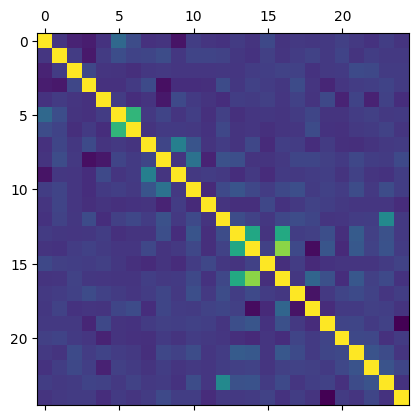

In [ ]:
p351d5(data3)

In [ ]:
# 5/5 2/2 Mencione cual es el par de variables más relacionadas
def p352d5(df):

  col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas numéricas
  df = df[col] # Nueva Bd con solo las conlumnas numéricas

  #Verificación por medio de la gráfica
  print(f"Las columnas con mayor correlación según la gráfica de correlación son la 16 '{df.columns[16]}' y la 14 '{df.columns[14]}' del listado de columnas numéricas\n")

  #Verificación por medio de los valores
  print(f"A continuación se presenta un listado oredenado de menor a mayor con los valores de las correlaciones de las columnas, lo uso para verificar lo que hice por medio del gráfico\n")
  return df.corr().unstack().sort_values().drop_duplicates()


In [ ]:
p352d5(data3)

Las columnas con mayor correlación según la gráfica de correlación son la 16 'IMC' y la 14 'Peso' del listado de columnas numéricas

A continuación se presenta un listado oredenado de menor a mayor con los valores de las correlaciones de las columnas, lo uso para verificar lo que hice por medio del gráfico



Adherencia al tratamiento           Microalbuminuria      -0.203131
Factor de corrección de la formula  Peso                  -0.162299
Escolaridad                         Colesterol HDL        -0.156112
Trigliceridos                       Edad (años)           -0.139211
Factor de corrección de la formula  Creatinina            -0.138978
                                                             ...   
Peso                                Perimetro Abdominal    0.520127
IMC                                 Perimetro Abdominal    0.526755
Tension DIASTOLICA                  Tension SISTOLICA      0.587914
Peso                                IMC                    0.790173
Edad (años)                         Edad (años)            1.000000
Length: 301, dtype: float64